# Capstone 1: Collaborative Filtering Based Book Recommendation Engine

# Project Summary

## Introduction

Recommendation engines have laid the foundation of every major tech company around us that provides retail, video-on-demand or music streaming service and thus redefined the way we shop, search for an old friend, find new music or places to go to. From finding the best product in the market to searching for an old friend online or listening to songs while driving, recommender systems are everywhere. A recommender system helps to filter vast amount of information from all users and item database to individual’s preference. For example, Amazon uses it to suggest products to customers, and Spotify uses it to decide which song to play next for a user. 
Book reading apps like Goodreads has personally helped me to find books I couldn’t put away and thus getting back to the habit of reading regularly again. While a lot of datasets for movies (Netflix, Movielens) or songs have been explored previously to understand how recommendation engine works for those applications and what are the scopes of future improvement, book recommendation engines have been relatively less explored.
The primary goal of this project is to develop a collaborative book recommendation model using good#reads dataset that can suggest readers what books to read next. Additionally, data wrangling and exploratory data analysis will be utilized to draw insights about users reading preferences (e.g. how they like to tag, what ratings they usually provide etc.) and current trends in the book market (book categories that are in demand, successful authors in the market etc.).

## Key Busieness Insights

> **Understanding User Behavior**

- When the tag counts of different generalized tag_names were ranked, the top 10 tag name shows that users prefer to have separate shelves for books they marked as favorite, read in a particular year (e.g. read in 1990, Childhood Books), owned or borrowed from library, read in a different format (e.g. ebook\ audiobook). The other shelving preferance per the top 10 tag_names were different book categories such as 'Fiction', 'Young - Adult' etc.

- The count plot of user provided ratings shows that users are more likely to rate a book 4 or higher. As the tag counts for books they mark as favorite is also higher (shown previosuly), it seems that users are more likely to rate and store a book when they like it. 

- Users use a wide variety of names even if they are tagging a book in the same category. Foe example Science Fiction and Fantasy 

> **Factors to Consider for a Book's Rating**

- EDA shows that the top 15 books per tag_count as reader's favorite is not same as the top 15 books ranked per ratings of the users. Also, while the average rating counts for the top 15 books marked as the reader's favorite is significantly higher (2191465) than the average ratings received by all books (23833), the avaerage rating counts (18198) for the top 15 books is below the average. Both favorite and top rated 15 books have higher average ratings (4.26 and 4.74 respectively compared to the average ratings of all books (4.01). These statistics suggest that only considering the average rating is not enough to rank books for recommendation. An an ideal metric should also consider how many times the book has been marked as favorite and the total number of ratings it received in addition to the average rating of the book.

- 9 of the top 15 favorite books are most frequently tagged in the Young - Adult Category.The other popular categories in the top 15 favorite books are science fiction and fantasy, romance, historical fiction or fiction in general. The harry potter books (ranked 2,3,4,6,7) have also been freqently tagged as children/childhood books. A quick look at the publication date of these books reveal that most of the books under Young Adult and Childhood categories were actually publsihed at least 10 years ago. Therefore, they were probably the favorite books of many adult readers when they were young. This highlights that the year of publication and dates of ratings can also impact a book's ranking and should be factored into the performance metric. To be able to determine if the books are equally liked by current generation of young readers, one can check if the average number of positive ratings recevied by a book per year has reduced or increased since its year of publication. As the datasets used in this project do not provide the dates when the books were rated, it was not possible to implement this scheme into the recommendation framework. 

> **Book Categories**

- Based on the tag_counts of different book categories, it was found that 'Fiction' dominates as the popular category for users of all age groups (i.e. Adult and Young Adult readers). Beside fiction in general, tags related to 'Science Fiction and Fantasy' seems to be used more frequently than other categories in both adult and young adult section. Some other popular categories are Crime & Mysetery, Historical Fiction etc. Based on the findings, it seems that the demand for different kinds of fiction are higher than books based on actual events/facts (i.e. History or Science) in the market. The market seems to agree with these conclusions as about 43% of the books in the dataset are found to be Fiction, with Non - Fiction (20.5%), Young Adult (8.3%) and Science Fiction and Fantasy (5.73%) as other prevailing categories. 

- Does this finding indicate that a new Fiction has higher chances of getting a good rating than new history book? The answer is probably negative. When average ratings of different book categories were compared, it was found that readers do not have a bias towards rating a particular category higher than the others. The average rating in every category is close to the average rating of all the books (4.01) and mostly range from 3.25 to 4.75. Higher variability exists in the ratings of categories that have more books in the market than other categories. 

> **Authors in Demand**

- JK Rowling seems to be everyone's most favorite author with 4 of her books in the the 15 Favorite books. However, when authors were ranked per the number of books they wrote and the average ratings their books received, JK Rowling did not make it to the top 10. Stephen King seems to be the most successful authors with 44 books in the market with an average rating of 3.9. Other succesful authors considering both ratings and number of books are Dean Koontz, John Grisham, Nora Roberts and Jodi Picoult. This suggests that an ideal metric to evaluate an author's demand in the market should include the number of books an author wrote, the ratings the books received, the number of books that has been marked as favorite, and the tag counts as favorite for each book.

> **Rating Counts per Book and Per User**

- All the users in the dataset have rated at least 19 books where the most active users rated 200 books. 80% of the users rated at least 100 books
- All the books in the dataset received at least 8 ratings. When books were ramked by rating_counts, it seems that the top 10 books recived more than 10,000 ratings. CDF plot of the ratings per book showed that only ~20% of the book received more than 5000 ratings.
- As the number of books in the dataset 10000 are less than the number of users (53,424), sparsity is less likely to be an issue for ML modeling with this dataset.

#  Outline for EDA

- Goal of Exploratory Data Analysis 
- Import Packages
- Import Clean Datasets
- The Questions of Interest
- Summary of Findings from EDA



# Goal of Exploratory Data Analysis 

In the Exploratory Data Analysis,  the datasets cleaned by data wrangling will be explored to get insights about reader's behavioral pattern, reading preferences and factors affecting a book's rating or an author's success.    

Some of the questions we will try to answer are as follows 

    - What books users have shelved more frequently? 
    - Are their particular authors/ genres/books from a particular era that they really like?
    - What are their most favorite books?
    - Does the reading preference vary depending on their age group
    - Should we only look for high ratings when we consider a book, or there are more factors to consider
    - What rating users like to provide in general, does it indicate that they only like to rate when they like a book. 
    - Based on the average user rating, what should we consider to be a really good book to reocmmend.
    - How are different authors performing, what is contributing their success 
    - Does the readers have a general bias towards certain categories (Are there categories that rate significantly high > compared to other categories?

# Import Packages

In [4]:
import matplotlib.pyplot as plt
#Import package for pandas dataframe
import pandas as pd
# Import the regular expression module
import seaborn as sns
import numpy as np

# Import Clean Datasets

In [5]:
ratings = pd.read_csv( 'ratings.csv' ) # ratings for different books
b = pd.read_csv( 'books.csv' ) # list of books and necessary infor about the books
tag_frequency = pd.read_csv( 'Tidy_Data_for_Tag_Frequency.csv' )
Books_Per_Tag =  pd.read_csv( 'Tidy_Data_for_Books_Per_Tag.csv' )
tag_table = pd.read_csv('Tidy_Tag_Table.csv')
tag_frequency.head(10)

,tag_name,tag_id,Frequency
0,Books Read By Year,59812,59812
1,Owned Books,44351,44351
2,Ebooks,37090,37090
3,Favorite,35534,35534
4,Audio Books,32747,32747
5,Fiction,26252,26252
6,Science Fiction & Fantasy,20111,20111
7,Children Books,18314,18314
8,Young-Adult,12035,12035
9,to-read,9834,9834


# The Questions of Interest

## How Users Like to Tag Their Books ?

Text(0.5,1,'Top 15 Tags Based on User Preferences')

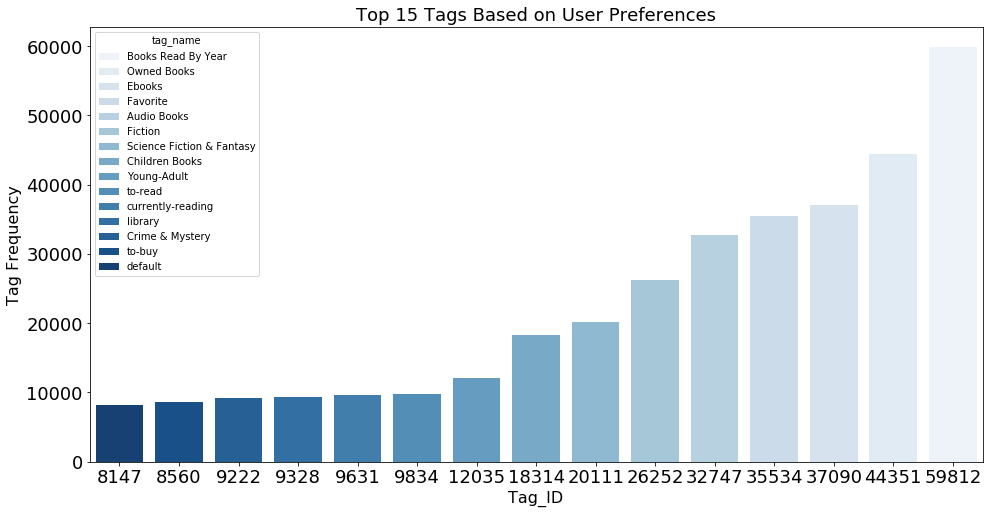

In [6]:
# How Users like to Shelve Their Books
plt.figure(figsize=(16, 8))
g = sns.barplot(x="tag_id", y="Frequency", hue = "tag_name",palette="Blues",data=tag_frequency[0:15][:],dodge=False)
plt.xlabel("Tag_ID", fontsize=16)
plt.ylabel("Tag Frequency", fontsize=16)
plt.xticks(  fontsize= 18)
plt.yticks(  fontsize= 18)
plt.title("Top 15 Tags Based on User Preferences",fontsize=18)

In [7]:
sum(tag_frequency.Frequency[0:15])/sum(tag_frequency.Frequency)

0.48558074356367115

### Observations:
     - Users in general likes to keep a track of book they already read, currently reading and plaaning to read. They have a  preference to shelf the books they read in a given duration.  
     - Readers like to shelf Ebooks, Audiobooks are separately from paperbacks 
     - Fiction seems to be the most popular category over other book categories
     - The top 15 tag_names contains 50% of the total tags made by the users

## How Does Tag Preferences Vary for Books for Different Age - Groups?

### Lets Group Tags Per Age Group

In [8]:
# Define a function to create a Boolean Mask 
def Filtered(dataframe,List):
    if dataframe in List:
        dataframe = True
    else:
        dataframe = False
    return dataframe

# Apply the filter function defined above to make a boolean mask to keep only the tags below
tag_names_adult = ['Fiction', 'Non-Fiction','Historical Fiction','Science','History','Women Book List','Crime & Mystery','Science Fiction & Fantasy','romance']
tag_names_to_ya = ['Young-Adult','Young-Adult-Fantasy','Young-Adult-Fiction','Young-Adult-Romance','Young-Adult-Paranormal']
tag_names_children = ['Children Books']
tag_names_to_keep = tag_names_adult + tag_names_to_ya + tag_names_children
filter = tag_frequency.tag_name.apply(lambda x:Filtered(x,tag_names_to_keep ))

# Use the boolean mask to filter data
tags_for_book_categories = tag_frequency[filter]
tags_for_book_categories.head()


,tag_name,tag_id,Frequency
5,Fiction,26252,26252
6,Science Fiction & Fantasy,20111,20111
7,Children Books,18314,18314
8,Young-Adult,12035,12035
12,Crime & Mystery,9222,9222


In [9]:
# Add a column to group categories as Adult, Young - Adult and Children\Childhood 

In [10]:
def filter_by_age_group(dataframe,adult,young_adult,children):
    if dataframe in adult:
        dataframe = 'Adult'
    if dataframe in young_adult:
        dataframe = 'Young-Adult'
    if dataframe in children:
        dataframe = 'Children/Childhood'
    return dataframe

tags_for_book_categories ['Age_Group'] = tags_for_book_categories.tag_name.apply(lambda x:filter_by_age_group(x,tag_names_adult,tag_names_to_ya,tag_names_children))
tags_for_book_categories.head()
                                                                      

C:\Users\shamabar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,tag_name,tag_id,Frequency,Age_Group
5,Fiction,26252,26252,Adult
6,Science Fiction & Fantasy,20111,20111,Adult
7,Children Books,18314,18314,Children/Childhood
8,Young-Adult,12035,12035,Young-Adult
12,Crime & Mystery,9222,9222,Adult


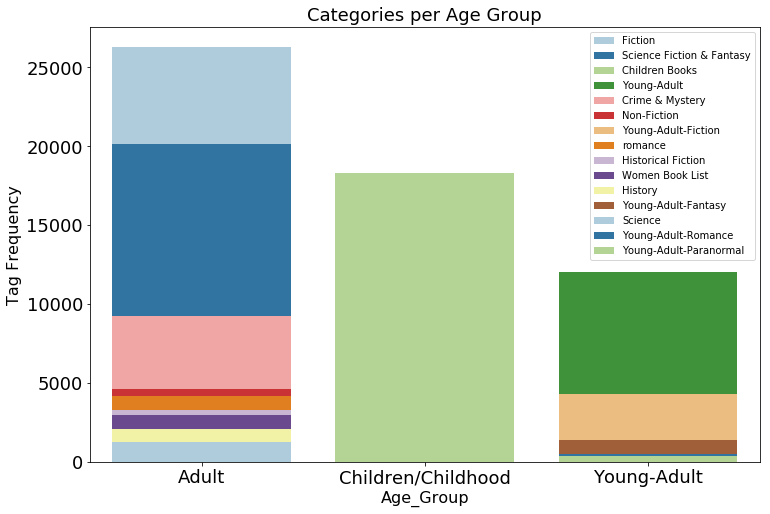

In [11]:
# How Users like to Shelve Their Books
plt.figure(figsize=(12, 8))
g = sns.barplot(x="Age_Group", y="Frequency", hue = "tag_name",palette="Paired",data=tags_for_book_categories[0:15][:],dodge=False)
plt.xlabel( "Age_Group",fontsize=16)
plt.ylabel("Tag Frequency", fontsize=16)
plt.xticks(  fontsize= 18)
plt.yticks(  fontsize= 18)
plt.title("Categories per Age Group",fontsize=18)
plt.legend(loc='upper right')

### Observations:

- Most tag_names are for adult books than other age groups. For example, children/ childhood books has no sub-categories, and yound adult book has few subcategories compared to adult books.
- Fiction dominates as the popular category for all users.

## What are the Categories in Each Group?

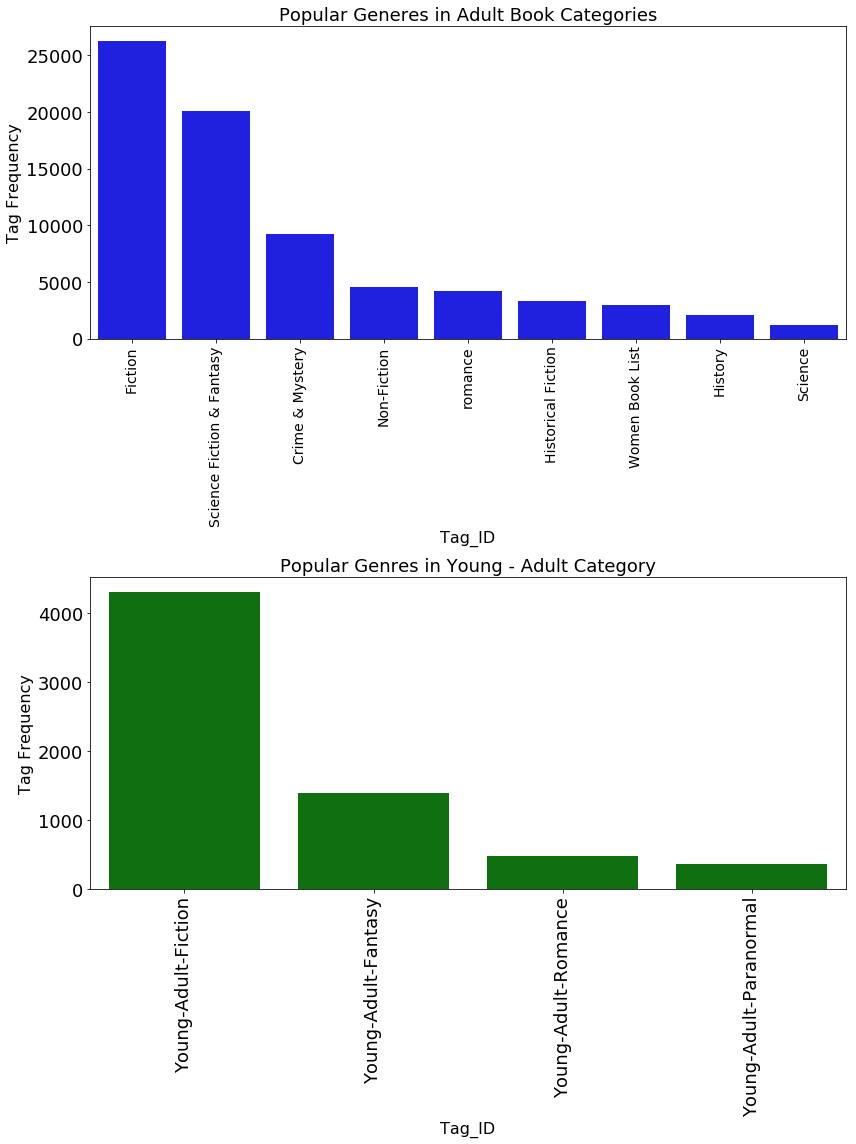

In [12]:
# Plot Popular Adult Subcategories

Freq_Adult_SubCategories = tags_for_book_categories[tags_for_book_categories['Age_Group'] == "Adult"]
plt.figure(figsize = (12, 16))
plt.subplot(2, 1, 1)
g = sns.barplot(x="tag_name", y="Frequency",color="Blue",data=Freq_Adult_SubCategories )
plt.xlabel("Tag_ID", fontsize=16)
plt.ylabel("Tag Frequency", fontsize=16)
plt.xticks(rotation = 90, fontsize=14)
plt.yticks(  fontsize= 18)
plt.title("Popular Generes in Adult Book Categories",fontsize=18)


# sub-categories in young adult

def filter_YA_Sub_categotires(dataframe,List):
    if dataframe in List:
        dataframe = True
    else: 
        dataframe = False
    return dataframe
   
sub_YA_categories = ['Young-Adult-Fantasy','Young-Adult-Fiction','Young-Adult-Romance','Young-Adult-Paranormal']
Filter_YA_SubCategories = tags_for_book_categories.tag_name.apply(lambda x:filter_YA_Sub_categotires(x,sub_YA_categories))
Frequent_YA_SubCategories = tags_for_book_categories[Filter_YA_SubCategories]
    
plt.subplot(2, 1, 2)
g = sns.barplot(x="tag_name", y="Frequency",color="Green",data = Frequent_YA_SubCategories)
plt.xlabel("Tag_ID", fontsize=16)
plt.ylabel("Tag Frequency", fontsize=16)
plt.xticks(rotation = 90,  fontsize=18)
plt.yticks(  fontsize= 18)
plt.title("Popular Genres in Young - Adult Category",fontsize=18)


plt.tight_layout()
plt.show()

### Observations:

- Beside fiction in general, tags related to Science Fiction and Fantasy seems to be used more frequently than other categories in both adult and young adult section. Some other popular categories are Crime  & Mysetery, Historical Fiction etc.Based on the list, one assumtion that we can draw is that majority of the readers like different kinds of fiction over books based on actual events/facts (i.e. History or Science)

Now lets take a look at the top 15 books marked as favorites and get an idea if the same sub - categories are liked by the users.

## What are the Top 15 Books Sheleved as Favorites?

In [13]:
# Top 15 Books Sheleved as Favorites
tag_table_pivot_table = tag_table.pivot_table(index = 'title', columns = 'tag_name', values = 'count', aggfunc='sum' )

#Make a list oftags for all grouped Generes and Favorites 
tag_names_to_keep_pivot_table = tag_names_to_keep + ['Favorite']
tag_table_pivot_table = tag_table_pivot_table[tag_names_to_keep_pivot_table]

#Drop cells with NaN in Favorites
tag_table_pivot_table.dropna(axis=0, subset=['Favorite']) 

# Rank the books in order of the times they have been tagged as Favorites
tag_table_pivot_table_sorted = tag_table_pivot_table.sort_values(by ='Favorite',ascending = False)
rank_limit = tag_table_pivot_table_sorted.shape[0]
tag_table_pivot_table_sorted['Rank'] = [x+1 for x in range(rank_limit )]

In [14]:
# Top_15_Favorite Books
Top_15_Fav =tag_table_pivot_table_sorted['Favorite'][0:15]
print('Top 15 books based on their tag count as favorites \n')
Top_15_Fav 

Top 15 books based on their tag count as favorites 



title
The Hunger Games (The Hunger Games, #1)                        61997.0
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)       60036.0
Harry Potter and the Deathly Hallows (Harry Potter, #7)        50777.0
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)    50256.0
The Fault in Our Stars                                         43330.0
Harry Potter and the Half-Blood Prince (Harry Potter, #6)      42610.0
Harry Potter and the Chamber of Secrets (Harry Potter, #2)     38064.0
Pride and Prejudice                                            38053.0
To Kill a Mockingbird                                          37430.0
The Book Thief                                                 36551.0
Divergent (Divergent, #1)                                      34910.0
The Perks of Being a Wallflower                                28039.0
Mockingjay (The Hunger Games, #3)                              27367.0
The Great Gatsby                                               24368.0


## What Catergories Do These Top 15 Books Belong to?

In [15]:
'''We will have to unpivot the top 15 books to put all the category columns into a single columm. We will keep the title column unchanged, 
the values under each column represents count. We will put them in the group.''' 

tag_table_pivot_table_sorted = tag_table_pivot_table_sorted.reset_index()


(0, 50000)

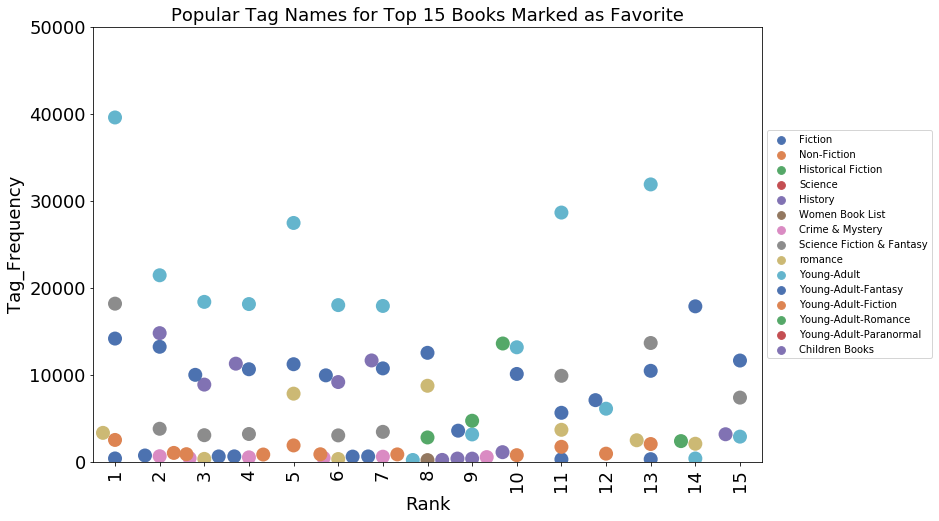

In [54]:
tag_table_pivot_table_melted = pd.melt(tag_table_pivot_table_sorted[0:15], value_name='count',id_vars = ['title','Rank'])#.dropna()
tag_table_pivot_table_melted = tag_table_pivot_table_melted [tag_table_pivot_table_melted.tag_name != 'Favorite']
tag_table_pivot_table_melted.sort_values(by='count',ascending = False)

plt.figure(figsize = (12, 8))
sns.swarmplot(x = 'Rank' ,y = 'count', hue = 'tag_name', palette = 'deep',data = tag_table_pivot_table_melted, size= 14)

plt.xticks(rotation = 90,  fontsize=18)
plt.yticks(  fontsize= 18)
plt.xlabel('Rank', fontsize=18)
plt.ylabel( 'Tag_Frequency', fontsize= 18)
plt.title('Popular Tag Names for Top 15 Books Marked as Favorite',fontsize=18)

#put legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size':10})
plt.ylim(0,50000)
plt.ylim(0,50000)

### Observations

-  9 of the top 15 favorite books are most frequently tagged in the Young - Adult Category.The popular categories in the top 15 books are science fiction and fantasy, romance, historical fiction or fiction in general. The harry potter books (2,3,4,6,7) have also been freqently tagged as children/childhood books.

- We will extract the details of these books from books.csv dataset to get an idea of what factors may lead to their popularity. For example, the fact that most of the books have been tagged as Young Adult and Childhood books indicate that these books may have been published a while ago and were the favorite books of many of the adult readers while they were young.

## When Did These Top 15 Favorite Books Publish?

In [17]:
# Lets find the title of these books from the book dataset
Filter = list(Top_15_Fav.index)
b.loc[b['original_title'].isin(Filter)]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...
46,47,19063,19063,878368,251,375831002,9.780376e+12,Markus Zusak,2005.0,The Book Thief,...,1159741,1287798,93611,17892,35360,135272,377218,722056,https://images.gr-assets.com/books/1390053681m...,https://images.gr-assets.com/books/1390053681s...
67,68,22628,22628,2236198,128,671027344,9.780671e+12,Stephen Chbosky,1999.0,The Perks of Being a Wallflower,...,888806,954905,47116,14286,38658,143440,297501,461020,https://images.gr-assets.com/books/1167352178m...,https://images.gr-assets.com/books/1167352178s...
465,466,659469,659469,16998382,44,345368584,9.780345e+12,"Chuck Dixon, J.R.R. Tolkien, David Wenzel, Sea...",1989.0,The Hobbit,...,155338,159435,957,991,2180,14437,43107,98720,https://images.gr-assets.com/books/1374681632m...,https://images.gr-assets.com/books/1374681632s...


In [18]:
# Only 7 results are returned when we search by title, so lets search by goodreads_book_id. So the first step is to find the good reads book id, and then use them to filter book details

top_15_goodreads_book_id = list(tag_table.loc[tag_table['title'].isin(Filter)].goodreads_book_id.unique())
b.loc[b['goodreads_book_id'].isin(top_15_goodreads_book_id )]


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...
11,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...
17,18,5,5,2402163,376,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,...,1832823,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
19,20,7260188,7260188,8812783,239,439023513,9.780439e+12,Suzanne Collins,2010.0,Mockingjay,...,1719760,1870748,96274,30144,110498,373060,618271,738775,https://images.gr-assets.com/books/1358275419m...,https://images.gr-assets.com/books/1358275419s...


In [19]:
Top_15_Fav_Books = b.loc[b['goodreads_book_id'].isin(top_15_goodreads_book_id )][['book_id','goodreads_book_id','authors','original_publication_year','original_title','ratings_1','ratings_2','ratings_3','ratings_4','ratings_5']]
Top_15_Fav_Books

,book_id,goodreads_book_id,authors,original_publication_year,original_title,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,Suzanne Collins,2008.0,The Hunger Games,66715,127936,560092,1481305,2706317
1,2,3,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,75504,101676,455024,1156318,3011543
3,4,2657,Harper Lee,1960.0,To Kill a Mockingbird,60427,117415,446835,1001952,1714267
4,5,4671,F. Scott Fitzgerald,1925.0,The Great Gatsby,86236,197621,606158,936012,947718
5,6,11870085,John Green,2012.0,The Fault in Our Stars,47994,92723,327550,698471,1311871
6,7,5907,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,46023,76784,288649,665635,1119718
9,10,1885,Jane Austen,1813.0,Pride and Prejudice,54700,86485,284852,609755,1155673
11,12,13335037,Veronica Roth,2011.0,Divergent,36315,82870,310297,673028,1114304
17,18,5,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,6716,20413,166129,509447,1266670
19,20,7260188,Suzanne Collins,2010.0,Mockingjay,30144,110498,373060,618271,738775


### Observations

- None of the top 15 favorite books are from recent times, it means the readership has grown over the years leading to higher number of tag frequencies. Some of the books were published at least a decade ago, and the oldest (Pride and Prejudice) date backs to 1813. 

## Who are the Authors of the Books Marked as Favorites by Most Users?

In [20]:
Top_15_Fav_Books.authors.value_counts()

J.K. Rowling, Mary GrandPré                4
Suzanne Collins                            2
Markus Zusak                               1
John Green                                 1
F. Scott Fitzgerald                        1
Harper Lee                                 1
J.K. Rowling, Mary GrandPré, Rufus Beck    1
J.R.R. Tolkien                             1
Veronica Roth                              1
Jane Austen                                1
Stephen Chbosky                            1
Name: authors, dtype: int64

### Observation:
JK Rowling is everyone's favorite author

## What are the Top 15 Books based on Ratings?

In [21]:
b['Total Reviews'] =  b[['ratings_1','ratings_2','ratings_3','ratings_4','ratings_5']].sum(axis = 1)
b['Avg Rating'] =  (b['ratings_1']*1 + b['ratings_2']*2 + b['ratings_3']*3 + b['ratings_4']*4 + b['ratings_5']*5)/b['Total Reviews']

b_ratings = b [['goodreads_book_id','original_title','authors','original_publication_year',
'Total Reviews','Avg Rating']]
Top_15_Rated = b_ratings.sort_values(by = 'Avg Rating',ascending = False)[0:15]
Top_15_Rated

,goodreads_book_id,original_title,authors,original_publication_year,Total Reviews,Avg Rating
3627,24812,The Complete Calvin and Hobbes,Bill Watterson,2005.0,29968,4.818306
3274,8,NaN,"J.K. Rowling, Mary GrandPré",2003.0,33424,4.772349
861,17332218,Words of Radiance,Brandon Sanderson,2014.0,108176,4.765142
7946,5031805,NaN,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,10784,4.763724
8853,95602,Mark of the Lion Trilogy,Francine Rivers,1993.0,9547,4.759087
4482,24814,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,1996.0,23429,4.754492
6360,70489,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,1996.0,17285,4.740989
421,862041,Complete Harry Potter Boxed Set,J.K. Rowling,1998.0,204125,4.740448
6919,24815,The Indispensable Calvin and Hobbes: A Calvin ...,Bill Watterson,1992.0,16911,4.730176
3752,10,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,2005.0,26274,4.727754


Observations :
    
    - Except for Harry potter, none of the books in the Top 15 favorites are in the top rated list. However, the # reviews for these books are fairly low compared to the average reviews ( 2437524) received by books listed as favorites. 

## Does Favorite Books Receive More Reviews than the Rest of the Books?

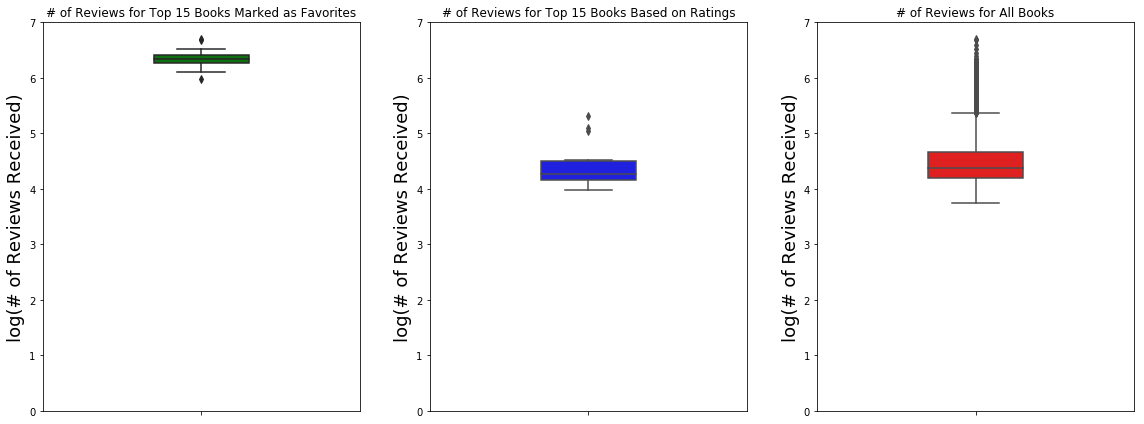

Median # of reviews for the books rated as favorite: 
 2191465.0
Median # of reviews for the top rated 15 books: 
 18198.0
Median # of reviews for all the the books: 
 23832.5


In [22]:
## Total Number of Ratings Recieved by Each of the Favorite Books and Highly Rated Books
Top_15_Fav_Books['Top_15_Fav_Books Reviews']  = b.loc[b['goodreads_book_id'].isin(top_15_goodreads_book_id )]['Total Reviews']

## Overlaying two boxplots in Seaborn
plt.figure(figsize = (16, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y = np.log10(Top_15_Fav_Books['Top_15_Fav_Books Reviews']), width=0.3, color = 'green')
plt.ylabel('log(# of Reviews Received)', fontsize=18)
plt.ylim(0,7)
plt.title('# of Reviews for Top 15 Books Marked as Favorites')


plt.subplot(1, 3, 2)
sns.boxplot(y = np.log10(Top_15_Rated['Total Reviews']), width=0.3 , color = 'blue')
plt.ylabel('log(# of Reviews Received)', fontsize=18)
plt.ylim(0,7)
plt.title('# of Reviews for Top 15 Books Based on Ratings')

plt.subplot(1, 3, 3)
sns.boxplot(y = np.log10(b['Total Reviews']),width=0.3, color = 'red')
plt.ylabel('log(# of Reviews Received)', fontsize=18)
plt.ylim(0,7)
plt.title('# of Reviews for All Books')

plt.tight_layout()
plt.show()

print ('Median # of reviews for the books rated as favorite: \n',Top_15_Fav_Books['Top_15_Fav_Books Reviews']  .median())
print ('Median # of reviews for the top rated 15 books: \n',Top_15_Rated['Total Reviews'] .median())
print ('Median # of reviews for all the the books: \n',b['Total Reviews'] .median())

### Observation:
- As can be seen from the box plots above, books shelved a favorites have recieved a significantly higher number of reviews compared to other books. The y scale in the box plot are in log scale. So if we have to recommend a user a new book to read, we should probbaly look at the reader's most favorite list first as the possibility for someone to like that same book is siginificantly higher.

- Users like to put on a review for books they mark as favorites

## How are Favorite Books Rated Compared to Other Books ?

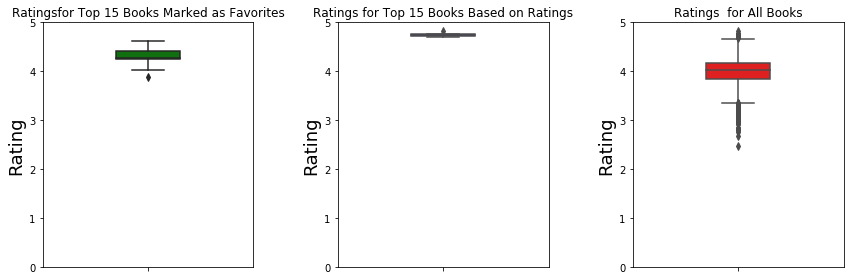

Median of the ratings for the books rated as favorite: 
 4.264217954505934
Median of the ratings for the books with high ratings: 
 4.740448254745867
Median of the ratings for all the the books: 
 4.018821797349181


In [55]:
## Total Number of Ratings Recieved by Each of the Favorite Books 
Top_15_Fav_Books['Top_15_Fav_Avg_Rating']  = (Top_15_Fav_Books['ratings_1']*1 + Top_15_Fav_Books['ratings_2']*2 + Top_15_Fav_Books['ratings_3']*3 + Top_15_Fav_Books['ratings_4']*4 + Top_15_Fav_Books['ratings_5']*5)/Top_15_Fav_Books['Top_15_Fav_Books Reviews']
b['Avg Rating'] =  (b['ratings_1']*1 + b['ratings_2']*2 + b['ratings_3']*3 + b['ratings_4']*4 + b['ratings_5']*5)/b['Total Reviews']

plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
sns.boxplot(y = Top_15_Fav_Books['Top_15_Fav_Avg_Rating'], width=0.3, color = 'green')
plt.ylabel('Rating', fontsize=18)
plt.ylim(0,5)
plt.title('Ratingsfor Top 15 Books Marked as Favorites')

plt.subplot(1, 3, 2)
sns.boxplot(y = Top_15_Rated['Avg Rating'],width=0.3, color = 'blue')
plt.ylabel('Rating', fontsize=18)
plt.ylim(0,5)
plt.title('Ratings for Top 15 Books Based on Ratings')

plt.subplot(1, 3, 3)
sns.boxplot(y = b['Avg Rating'],width=0.3,color = 'red')
plt.ylabel('Rating', fontsize=18)
plt.ylim(0,5)
plt.title('Ratings  for All Books')
plt.tight_layout()
plt.show()

print ('Median of the ratings for the books rated as favorite: \n',Top_15_Fav_Books['Top_15_Fav_Avg_Rating'] .median())
print ('Median of the ratings for the books with high ratings: \n',Top_15_Rated['Avg Rating'].median())
print ('Median of the ratings for all the the books: \n',b['Avg Rating'] .median())

### Observation

- Based on the high average ratings of the books, it seems that readers in general likes to rate the books failry high. 
- We should also rank the book dataset by ratings and check how many of books marked frequently as favorites are there.

In [24]:
Top_15_Fav.index

Index(['The Hunger Games (The Hunger Games, #1)',
       'Harry Potter and the Sorcerer's Stone (Harry Potter, #1)',
       'Harry Potter and the Deathly Hallows (Harry Potter, #7)',
       'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)',
       'The Fault in Our Stars',
       'Harry Potter and the Half-Blood Prince (Harry Potter, #6)',
       'Harry Potter and the Chamber of Secrets (Harry Potter, #2)',
       'Pride and Prejudice', 'To Kill a Mockingbird', 'The Book Thief',
       'Divergent (Divergent, #1)', 'The Perks of Being a Wallflower',
       'Mockingjay (The Hunger Games, #3)', 'The Great Gatsby', 'The Hobbit'],
      dtype='object', name='title')

Few Factors for a Reader to Like this Book

- User Id 
- Books they Rated 
- Ratings They Gave 
- year of publication
- categories
- total number of reviews
- Ratings 
- Author

## What Ratings Most of the Users Like to Give?

Text(0.5,1,'Count Plot for User Ratings')

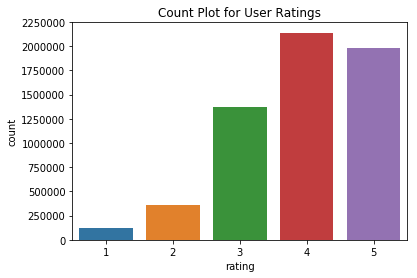

In [38]:
ratings.head()
sns.countplot('rating', data = ratings)
plt.title('Count Plot of User Ratings')

### Observations:
- The count plot shows that users are more likely to rate a book 4 or higher.

## What are the Most Frequent Tags a Books Received?

In [26]:
# Filter out the top 5 tags received by each book and store then as a seprate column in the dataframe. 
tag_table_pivot_table_melted = pd.melt(tag_table_pivot_table_sorted, value_name='count',id_vars = ['title','Rank'])#.dropna()
tag_table_pivot_table_melted = tag_table_pivot_table_melted [tag_table_pivot_table_melted.tag_name != 'Favorite']
frequent_tb = tag_table_pivot_table_melted.sort_values(by='count',ascending = False).dropna()
frequent_tb['People Often Tagged as'] = pd.Series()
for book in frequent_tb.title:
    popular_tag = list(set(frequent_tb[frequent_tb.title == book].tag_name))
    Boolean_Mask = frequent_tb.title==book 
    idx = list(frequent_tb.index[Boolean_Mask])
   
    for i in idx:
        frequent_tb['People Often Tagged as'][i] = popular_tag[:5]        

C:\Users\shamabar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\shamabar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
frequent_tb[frequent_tb.title == 'The Hunger Games (The Hunger Games, #1)' ]

,title,Rank,tag_name,count,People Often Tagged as
88326,"The Hunger Games (The Hunger Games, #1)",1,Young-Adult,39604.0,"[Science Fiction & Fantasy, Young-Adult-Fictio..."
68698,"The Hunger Games (The Hunger Games, #1)",1,Science Fiction & Fantasy,18196.0,"[Science Fiction & Fantasy, Young-Adult-Fictio..."
0,"The Hunger Games (The Hunger Games, #1)",1,Fiction,14183.0,"[Science Fiction & Fantasy, Young-Adult-Fictio..."
78512,"The Hunger Games (The Hunger Games, #1)",1,romance,3341.0,"[Science Fiction & Fantasy, Young-Adult-Fictio..."
107954,"The Hunger Games (The Hunger Games, #1)",1,Young-Adult-Fiction,2528.0,"[Science Fiction & Fantasy, Young-Adult-Fictio..."
98140,"The Hunger Games (The Hunger Games, #1)",1,Young-Adult-Fantasy,399.0,"[Science Fiction & Fantasy, Young-Adult-Fictio..."


In [28]:
# Only store one data per book that shows the most frequent tag, corresponding count and the top 5 tags
idx =frequent_tb.groupby(['title'])['count'].transform(max) == frequent_tb['count']
book_tags = frequent_tb[idx].sort_values(by='count',ascending = False)
#Lets drop the column Rank
book_tags = book_tags.drop('Rank',axis = 1)

In [29]:
# Merge book_id, author info from books.csv  with book_tags
b['title'] = b["original_title"]
filter_b = b[['title','book_id','authors','Avg Rating',]]
tag_kw_recom_dataset = filter_b.merge(book_tags, on ='title')
tag_kw_recom_dataset.head()

,title,book_id,authors,Avg Rating,tag_name,count,People Often Tagged as
0,To Kill a Mockingbird,4,Harper Lee,4.254818,Historical Fiction,4735.0,"[Children Books, Young-Adult, Crime & Mystery,..."
1,The Great Gatsby,5,F. Scott Fitzgerald,3.887376,Fiction,17889.0,"[Fiction, Historical Fiction, romance, Young-A..."
2,The Fault in Our Stars,6,John Green,4.264218,Young-Adult,27475.0,"[Fiction, Young-Adult-Fiction, romance, Young-..."
3,The Catcher in the Rye,8,J.D. Salinger,3.790131,Fiction,15326.0,"[Fiction, Historical Fiction, Young-Adult]"
4,Pride and Prejudice,10,Jane Austen,4.243559,Fiction,12543.0,"[Women Book List, Young-Adult, romance, Fictio..."


## Comparison of Average Ratings and Number of Books in Different Categories

In [30]:
#count total number of books in each category
count_books = tag_kw_recom_dataset.groupby('tag_name').count().sort_values(by= 'count',ascending = False);
#calculate the % of books in each category
total = count_books['count'].sum()
count_books ['count'] =[x*100/total for x in count_books['count']]
count_books.index

Index(['Fiction', 'Non-Fiction', 'Young-Adult', 'Children Books',
       'Science Fiction & Fantasy', 'Historical Fiction', 'Crime & Mystery',
       'romance', 'History', 'Science', 'Women Book List'],
      dtype='object', name='tag_name')

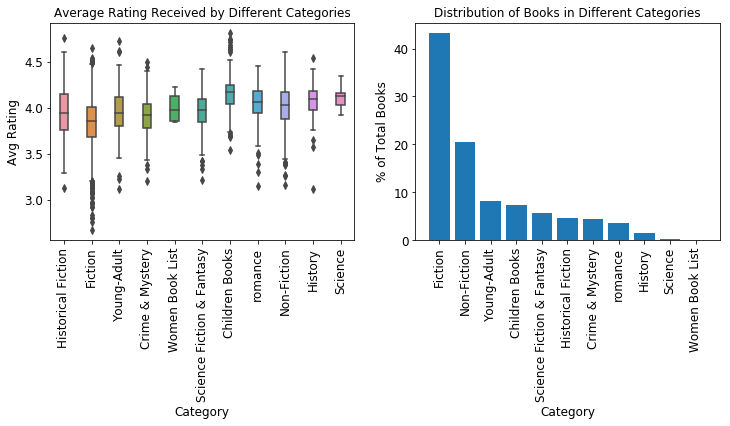

In [53]:
plt.figure(figsize = (12,4))

plt.subplot(1, 2, 1)
sns.boxplot(x = tag_kw_recom_dataset['tag_name'] ,y = tag_kw_recom_dataset['Avg Rating'], width=0.3)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Avg Rating', fontsize=12)
plt.xticks(rotation = 90,  fontsize=12)
plt.yticks(  fontsize= 12)
plt.title("Average Rating Received by Different Categories")

plt.subplot(1, 2, 2)
total = count_books['count'].sum()
count_books ['count'] =[x*100/total for x in count_books['count']]
plt.bar (count_books.index, count_books['count'])
plt.xlabel('Category', fontsize=12)
plt.ylabel('% of Total Books', fontsize = 12)
plt.xticks(rotation = 90,  fontsize=12)
plt.yticks(  fontsize= 12)
plt.title("Distribution of Books in Different Categories")

plt.show()

### Observations
- Readers do not have a bias towards rating a particular category higher than the others. The average rating in every category is close to the average rating of all the books and mostly range from 3.25 to 4.75. 
-  ~ %43 of the books in the dataset are Fiction, with Non - Fiction (20.5%), Young Adult (8.3%) and Science Fiction and Fantasy (5.73%) as other popular categories.

In [32]:
count_books['count']

tag_name
Fiction                      43.197194
Non-Fiction                  20.546229
Young-Adult                   8.293661
Children Books                7.416688
Science Fiction & Fantasy     5.737910
Historical Fiction            4.735655
Crime & Mystery               4.485091
romance                       3.558006
History                       1.578552
Science                       0.350789
Women Book List               0.100226
Name: count, dtype: float64

##  Which Authors Have More Books and How the Ratings Compare for Different Authors?

In [33]:
count_authors = tag_kw_recom_dataset.groupby('authors').count().sort_values(by= 'count',ascending = False);
total = count_books['count'].sum()
#count_books ['count'] =[x*100/total for x in count_books['count']]
most_books_auth = count_authors['count'] [0:10]
most_books_auth 

authors
Stephen King          44
Dean Koontz           35
John Grisham          29
Nora Roberts          28
Jodi Picoult          21
Kurt Vonnegut Jr.     15
Mary Higgins Clark    15
Sidney Sheldon        15
Nicholas Sparks       15
Michael Crichton      14
Name: count, dtype: int64

In [34]:
# Display full (non - truncated dataframe)
pd.set_option('display.max_colwidth', -1)
# Find top authors by rating
Authors_by_Rating = tag_kw_recom_dataset.groupby('authors').mean().sort_values(by= 'Avg Rating',ascending = False);
display(Authors_by_Rating ['Avg Rating'] )

authors
Bill Watterson                                                                                                                                                                                                              4.706259
Neil Gaiman, Mike Dringenberg, Chris Bachalo, Michael Zulli, Kelly Jones, Charles Vess, Colleen Doran, Malcolm Jones III, Steve Parkhouse, Daniel Vozzo, Lee Loughridge, Steve Oliff, Todd Klein, Dave McKean, Sam Kieth    4.651464
Angie Thomas                                                                                                                                                                                                                4.618345
Anonymous                                                                                                                                                                                                                   4.613276
Bill Watterson, G.B. Trudeau                                                

In [35]:
average_authors = tag_kw_recom_dataset.groupby('authors').median()
author_rating = {'Author': [], 'Rating': []}
for author in most_books_auth.index:
    author_rating['Author'].append(author)
    author_rating['Rating'].append(average_authors.loc[author] ['Avg Rating'])
author_rating = pd.DataFrame.from_dict(author_rating)
author_rating

,Author,Rating
0,Stephen King,3.896395
1,Dean Koontz,3.817734
2,John Grisham,3.795866
3,Nora Roberts,4.005326
4,Jodi Picoult,3.799404
5,Kurt Vonnegut Jr.,3.934352
6,Mary Higgins Clark,3.853492
7,Sidney Sheldon,3.680899
8,Nicholas Sparks,4.021555
9,Michael Crichton,3.674956


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1152x576 with 0 Axes>

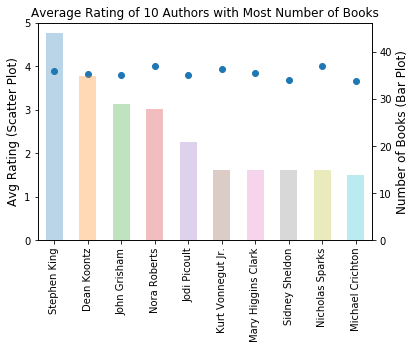

In [52]:
plt.figure(figsize = (16,8))
fig, ax1 = plt.subplots ()

ax2 = ax1.twinx()
ax1.scatter( author_rating.index, author_rating['Rating'])
#ax2.bar(most_books_auth.index,  most_books_auth.count)
ax2 = most_books_auth.plot(kind='bar',alpha = 0.3)

ax1.set_ylabel('Avg Rating (Scatter Plot)', fontsize=12)
ax2.set_ylabel('Number of Books (Bar Plot)', fontsize=12)
ax1.set_xticklabels(author_rating.Author,rotation= 90) 
ax1.set_ylim([0,5])
plt.title('Average Rating of 10 Authors with Most Number of Books')
plt.show

In [37]:
# Import Dataset
tag_kw_recom_dataset.to_csv('Additional dataset_for_tag&KW_recommendation.csv', encoding = 'utf-8')

# Summary of Findings from EDA

- The count plot of user provided ratings shows that users are more likely to rate a book 4 or higher. As the tag counts for books they mark as favorite is also higher (shown previosuly), it seems that users are more likely to rate and store a  book when they like it.  

- When the tag counts of different generalized tag_names were ranked, the top 10 tag name shows that users prefer to have separate shelves for books they marked as favorite, read in a particular year (e.g. read in 1990, Childhood Books), owned or borrowed from library, read in a different format (e.g. ebook\ audiobook). The other shelving preferance per the top 10 tag_names were different book categories such as 'Fiction', 'Young - Adult' etc.

- EDA shows that the top 15 books per tag_count as reader's favorite is not same as the top 15 books ranked per ratings of the users. Also, while the average rating counts for the top 15 books marked as the reader's favorite is significantly higher (2191465) than the average ratings received by all books (23833),  the avaerage rating counts (18198) for the top 15 books is below the average. Both favorite and  top rated 15 books have higher average ratings (4.26 and 4.74 respectively compared to the average ratings of all books (4.01). These statistics suggest that only considering the average rating  is not enough to rank books for recommendation. An an ideal metric should also consider how many times the book has been marked as favorite and the total number of ratings it received in addition to the average rating of the book.

- Based on the tag_counts of different book categories, it was found that 'Fiction' dominates as the popular category for users of all age groups (i.e. Adult and Young Adult readers). Beside fiction in general, tags related to 'Science Fiction and Fantasy' seems to be used more frequently than other categories in both adult and young adult section. Some other popular categories are Crime  & Mysetery, Historical Fiction etc. Based on the findings, it seems that the demand for different kinds of fiction are higher than books based on actual events/facts (i.e. History or Science) in the market.

- 9 of the top 15 favorite books are most frequently tagged in the Young - Adult Category.The other popular categories in the top 15 favorite books are science fiction and fantasy, romance, historical fiction or fiction in general. The harry potter books (ranked 2,3,4,6,7) have also been freqently tagged as children/childhood books. A quick look at the publication date of these books reveal that  most of the books under  Young Adult and Childhood  categories were actually  publsihed  at least  10 years ago. Therefore, they were probably the favorite books of many  adult readers when they were young. This highlights that the year of publication and dates of ratings can also impact a book's ranking and should be factored into the performance metric. To be able to determine if the books are equally liked by current generation of young readers, one can check if  the average number of positive ratings recevied by a book per year has reduced or increased since its year of publication. As the datasets used in this project  do not provide the dates when the books were rated, it was not possible to implement this scheme into the recommendation framework. 

- JK Rowling seems to be everyone's most favorite  author with 4 of her books in the the 15 Favorite books. However, when authors were ranked per the number of books they wrote and the average ratings their books received, JK Rowling did not make it to the top 10. Stephen King seems to be the most successful authors with 44 books in the market with an average rating of 3.9. Other succesful authors considering both ratings and number of books are Dean Koontz, John Grisham, Nora Roberts and Jodi Picoult. This suggests that an ideal metric to evaluate an author's demand in the market should include the number of books an author wrote, the ratings the books received, the number of books that has been marked as favorite, and the tag counts as favorite for each book. 

- When average ratings of different book categories were compared, it was found that readers do not have a bias towards rating a particular category higher than the others. The average rating in every category is close to the average rating of all the books (4.01) and mostly range from 3.25 to 4.75. Higher variability exists in the ratings of categories that have more books in the market than other categories.  About 43% of the books in the dataset are Fiction, with Non - Fiction (20.5%), Young Adult (8.3%) and Science Fiction and Fantasy (5.73%) as other prevailing categories.